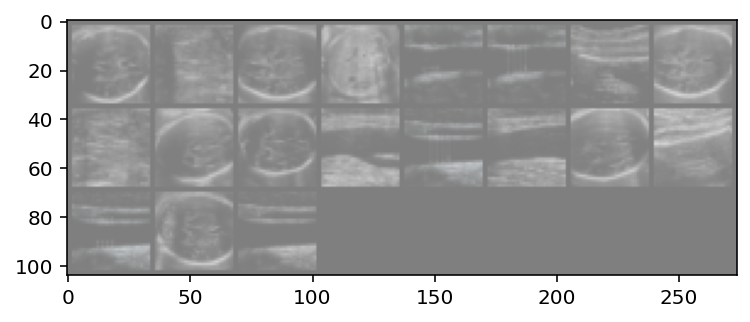

Pregnant Not Pregnant Pregnant Pregnant Not Pregnant Not Pregnant Pregnant Pregnant Not Pregnant Pregnant Pregnant Not Pregnant Not Pregnant Not Pregnant Pregnant Pregnant Not Pregnant Pregnant Not Pregnant

Loss: 
2.317466974258423
2.3169424533843994
2.315946340560913
2.314526081085205
2.3127243518829346
2.3105809688568115
2.308130979537964
2.3054046630859375
2.30243182182312
2.2992379665374756
2.2958457469940186
2.2922775745391846
2.288551092147827
2.2846832275390625
2.2806897163391113
2.276582956314087
2.272376298904419
2.268080949783325
2.263706922531128
2.259263277053833

Finished Training


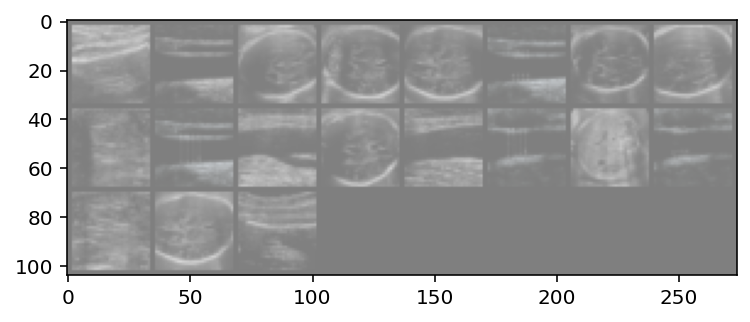

GroundTruth:  Pregnant Not Pregnant Pregnant Pregnant Pregnant Not Pregnant Pregnant Pregnant Not Pregnant Not Pregnant Not Pregnant Pregnant Not Pregnant Not Pregnant Pregnant Not Pregnant Not Pregnant Pregnant Pregnant
Predicted:  Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant Pregnant

Accuracy of the network on the 20 test images: 52 %

Accuracy for class: Not Pregnant is 0.0 %

Accuracy for class: Pregnant is 100.0 %


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms

batch_size = 19
data_dir = '/content/drive/MyDrive/Pregnant_NotPregnant_dataset'
transform = transforms.Compose([transforms.Resize(32),
transforms.CenterCrop(32),
transforms.ToTensor()])
#transform=transforms.Compose([transforms.ToTensor(),transforms.Resize(32)])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
images, labels = next(iter(dataloader))

classes = ('Not Pregnant', 'Pregnant')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 200)
        self.fc2 = nn.Linear(200, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

print("\nLoss: ")
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        print(running_loss)
print('\nFinished Training')


dataiter = iter(dataloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(19)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(19)))
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in dataloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nAccuracy of the network on the 20 test images: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in dataloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'\nAccuracy for class: {classname:5s} is {accuracy:.1f} %')

